In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal
%matplotlib inline

### To analyze:
- Mean area of each neighborhood
- Figure out a way of measuring agreement/overlap
    - Mean overlap of each polygon against all other polygons for a given neighborhood?
- Don't consider neighborhoods which have below a certain threshold

In [2]:
dna_polygons = gpd.read_file("dna_neighborhoods.geojson")
dna_polygons.head()

,geometry,neighborhood
0,POLYGON ((-87.68754959106445 41.92488743920406...,bucktown
1,POLYGON ((-87.68772125244141 41.92693092226143...,bucktown
2,POLYGON ((-87.68763542175293 41.92725021057667...,bucktown
3,POLYGON ((-87.66776561737061 41.91074091042736...,bucktown
4,"POLYGON ((-87.65356063842772 41.9112199638231,...",bucktown


In [12]:
neighborhoods_count = dna_polygons.groupby(["neighborhood"]).count()
neighborhoods_count.reset_index(inplace=True)
neighborhoods_count.sort_values(by=["geometry"], ascending=False, inplace=True)
neighborhoods_count[:15]

,neighborhood,geometry
81,ravenswood,79
55,lakeview,78
60,logan-square,77
57,lincoln-square,76
99,uptown,76
111,wicker-park,75
70,north-center,73
32,edgewater,72
97,ukrainian-village,72
56,lincoln-park,71


In [13]:
neighborhoods_count.sort_values(by=["geometry"], ascending=True, inplace=True)
neighborhoods_count[:15]

,neighborhood,geometry
41,grand-boulevard,1
103,west-englewood,1
14,brainerd,1
64,medical-district,1
52,jackson-highlands,1
90,south-austin,1
107,west-pullman,1
8,avalon-park,1
80,pullman,2
92,south-deering,2


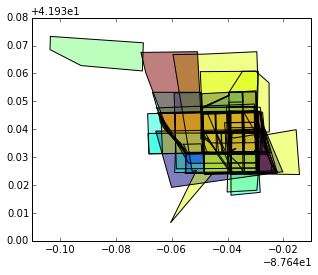

In [14]:
# Plot Ravenswood on the map, with the most responses
ravenswood = dna_polygons[dna_polygons["neighborhood"] == "ravenswood"]
ravenswood.plot()

In [15]:
dna_polygons["area"] = dna_polygons["geometry"].area
dna_polygons.head()

,geometry,neighborhood,area
0,POLYGON ((-87.68754959106445 41.92488743920406...,bucktown,0.000249
1,POLYGON ((-87.68772125244141 41.92693092226143...,bucktown,0.000213
2,POLYGON ((-87.68763542175293 41.92725021057667...,bucktown,0.000289
3,POLYGON ((-87.66776561737061 41.91074091042736...,bucktown,0.000202
4,"POLYGON ((-87.65356063842772 41.9112199638231,...",bucktown,0.000161


In [16]:
dna_polygons.sort_values(by="area", ascending=False, inplace=True)
dna_polygons[:10]

,geometry,neighborhood,area
2333,"POLYGON ((-87.7979278564453 41.70393428491598,...",altgeld-gardens,0.035448
344,POLYGON ((-87.61081695556639 41.83855443162865...,bronzeville,0.010648
2845,POLYGON ((-87.91980743408203 42.00823391072399...,ohare,0.006766
1442,POLYGON ((-87.77647018432617 41.68175859254098...,mt-greenwood,0.005983
2374,POLYGON ((-87.77389526367188 41.83388618820479...,archer-heights,0.005630
2844,POLYGON ((-87.84513473510742 41.97378534488486...,ohare,0.005440
886,POLYGON ((-87.75432586669922 41.77707262300616...,ashburn,0.004923
347,POLYGON ((-87.65544891357422 41.85255711882255...,bronzeville,0.004634
2634,POLYGON ((-87.68857955932617 41.96816973794843...,lincoln-park,0.004457
589,POLYGON ((-87.78127670288086 42.01218792326233...,jefferson-park,0.004058


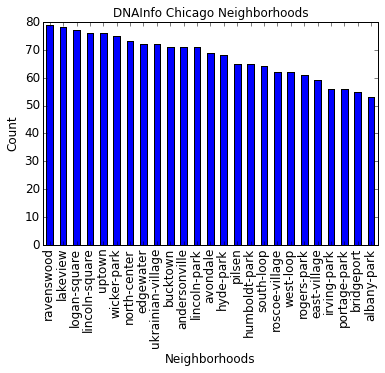

In [33]:
top_25_neighborhoods = neighborhoods_count.sort_values(by=["geometry"], ascending=False)[:25]

neighb_plot = top_25_neighborhoods[['neighborhood','geometry']].plot(
                                                                     kind='bar', 
                                                                     title ="DNAInfo Chicago Neighborhoods",
                                                                     legend=False, 
                                                                     fontsize=12
                                                                    )
neighb_plot.set_xlabel("Neighborhoods",fontsize=12)
neighb_plot.set_ylabel("Count",fontsize=12)
neighb_plot.set_xticklabels(list(top_25_neighborhoods["neighborhood"]))
plt.show()